In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import matplotlib.patches as patches

import cv2

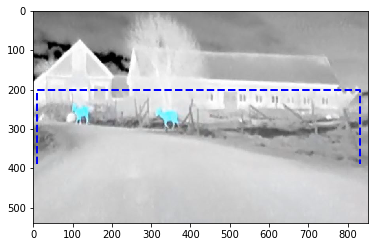

In [2]:
#reading in an image
image = mpimg.imread('test3.jpg')
#plt.show(image)
imshape = image.shape
# Create the basic black image 
mask = np.zeros(shape = image.shape, dtype = "uint8")

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

x = [10, 10, imshape[1]-20, imshape[1]-20]
y = [imshape[0]-150, 200, 200, imshape[0]-150]
plt.plot(x, y, 'b--', lw=2)




In [3]:
# Binary red channel threshold
def red_thres(img, thresh_min = 50, thresh_max = 200):
    red = img[:,:,2]
    red_binary = np.zeros_like(red)
    red_binary[(red >= thresh_min) & (red <= thresh_max)]  = 1
    return red_binary

# Binary saturation channel threshold
def s_thres(img, thresh_min = 50, thresh_max = 200):
    hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
    s_channel = hls[:,:,2]
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel > thresh_min) & (s_channel <= thresh_max)] = 1
    return s_binary

# Return saturation channel
def s_hls(img):
    hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
    return hls[:,:,2]

539 852


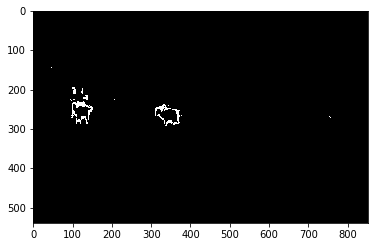

In [4]:
s_thres_image= s_thres(image)
h, w = s_thres_image.shape
print(h,w)
plt.imshow(s_thres_image,cmap='gray')



539 852


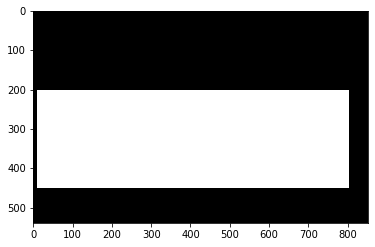

In [5]:
# Draw a white, filled rectangle on the mask image
cv2.rectangle(img = mask, pt1 = (10, 200), pt2 = (imshape[1]-50, 450), color = (255, 255,255), thickness = -1)
#gray_mask=cv2.cvtColor(mask,cv2.COLOR_BGR2GRAY)
gray_mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

#binary_mask= s_thres(gray_mask)

h, w= gray_mask.shape
print(h,w)
plt.imshow(gray_mask,cmap='gray')

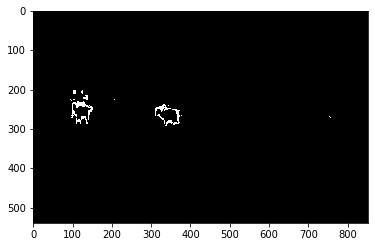

In [6]:
masked_image = cv2.bitwise_and(s_thres_image, gray_mask)
plt.imshow(masked_image,cmap='gray')

In [7]:
from scipy.ndimage.measurements import label
def draw_labeled_bboxes(img, labels):
    imshape = img.shape
   
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        if(np.min(nonzerox)> 150 and (np.min(nonzerox) < (imshape[0]- 400))):
            cv2.rectangle(img, bbox[0], bbox[1], (255,0,0), 6)
            str_cur = "Stop"
            cv2.putText(image, str_cur, (int(imshape[0]/2),int(imshape[1]/2)), cv2.FONT_HERSHEY_SIMPLEX,2,(255,0,0),2)
        else: 
            cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
            str_cur = "Caution"
            cv2.putText(image, str_cur, (int(imshape[0]/2),int(imshape[1]/2)), cv2.FONT_HERSHEY_SIMPLEX,2,(0,0,255),2)
        
    # Return the image
    return img

Text(0.5, 1.0, 'Final Image after applying Heat Map')

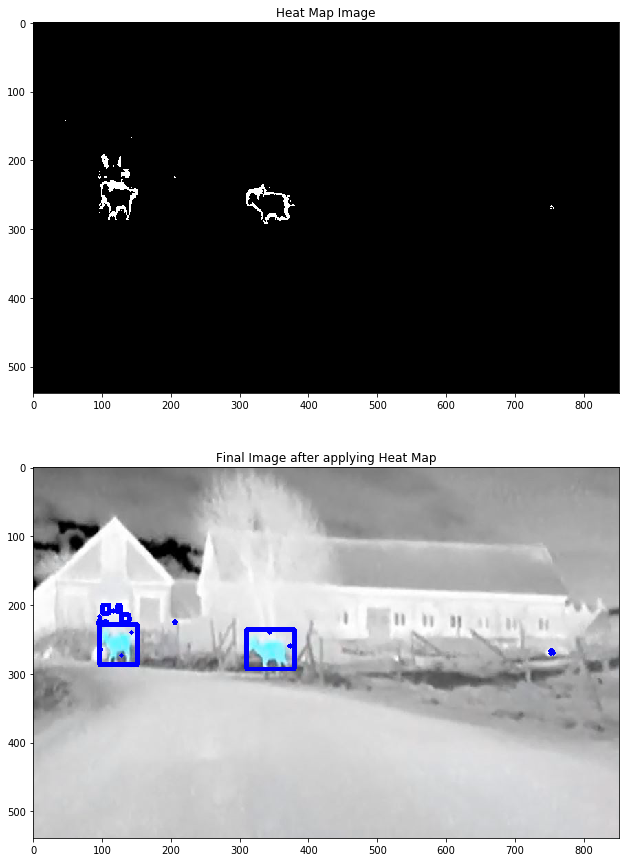

In [8]:
# Find final boxes from heatmap using label function
labels = label(masked_image)

draw_img = draw_labeled_bboxes(np.copy(image), labels)

f,axes= plt.subplots(2,1, figsize=(30,15))
axes[0].imshow(s_thres_image,cmap='gray')
axes[0].set_title("Heat Map Image")
axes[1].imshow(draw_img)
axes[1].set_title("Final Image after applying Heat Map")

In [9]:
def detect_animal(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    s_thres_image= s_thres(image)
    mask = np.zeros(shape = image.shape, dtype = "uint8")

    # Draw a white, filled rectangle on the mask image
    cv2.rectangle(img = mask, pt1 = (10, 200), pt2 = (imshape[1]-10, 450), color = (255, 255,255), thickness = -1)
    #gray_mask=cv2.cvtColor(mask,cv2.COLOR_BGR2GRAY)
    gray_mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

    masked_image = cv2.bitwise_and(s_thres_image, gray_mask)

    labels = label(masked_image)
   
    draw_img = draw_labeled_bboxes(np.copy(image), labels)
     
    return (draw_img)

In [10]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image where lines are drawn on lanes)
    
    result = detect_animal(image)
    
    return result

In [11]:
white_output = 'thermalside_out.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("thermalside.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video thermalside_out.mp4
[MoviePy] Writing video thermalside_out.mp4


100%|█████████▉| 1167/1168 [00:38<00:00, 30.57it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: thermalside_out.mp4 

Wall time: 38.5 s


In [12]:

HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))